In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#loading the dataset
data = pd.read_csv('houseprice.csv')

In [21]:
data.columns
# checking for column names

Index(['Price', 'Sqr Ft', 'Longitude', 'Latitude', 'Lot Size', 'Beds', 'Bath',
       'Year Built', 'Last Sold Year', 'Last Sold For', 'Address', 'City',
       'State', 'Zipcode', 'Address Full'],
      dtype='object')

In [22]:
data.shape
#checking the number of rows and columns

(30006, 15)

In [23]:
data.dtypes
#checking for data types of columns

Price              object
Sqr Ft             object
Longitude         float64
Latitude          float64
Lot Size           object
Beds              float64
Bath              float64
Year Built        float64
Last Sold Year    float64
Last Sold For      object
Address            object
City               object
State              object
Zipcode           float64
Address Full       object
dtype: object

In [24]:
data.sample(3)
#looking at 3 random rows as samples

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
26904,"$72,000",NaN,-81.44410,41.38334,4.43 acres,NaN,NaN,NaN,NaN,NaN,"V/l Chagrin Highlands Blvd Solon, OH 44139",Solon,OH,44139.0,"V/l Chagrin Highlands Blvd, Solon, OH 44139"
4755,"$121,000",NaN,-81.47163,28.57018,0.26 acres,NaN,NaN,NaN,2014.0,"$12,500","6701 Ambassador Dr Orlando, FL 32818",Orlando,FL,32818.0,"6701 Ambassador Dr, Orlando, FL 32818"
635,"$192,500","1,074 sqft",-84.43233,39.18736,"4,530 sqft",2.0,1.0,1923.0,NaN,NaN,"6227 Bona Vista Pl Cincinnati, OH 45213",Cincinnati,OH,45213.0,"6227 Bona Vista Pl, Cincinnati, OH 45213"


In [25]:
data.isnull().sum()
# checking for null values

Price                 0
Sqr Ft             2220
Longitude             0
Latitude              0
Lot Size           4516
Beds               2586
Bath               2510
Year Built         3748
Last Sold Year    15793
Last Sold For     15793
Address               0
City                  0
State                 0
Zipcode               3
Address Full          0
dtype: int64

In [26]:
data.duplicated().sum()
#checking for duplicate rows

np.int64(8)

In [27]:
data.nunique()
#checking for unique values

Price              6058
Sqr Ft             4871
Longitude         28134
Latitude          28234
Lot Size           6818
Beds                 26
Bath                 46
Year Built          166
Last Sold Year       32
Last Sold For      3868
Address           29964
City                676
State                34
Zipcode            2511
Address Full      29964
dtype: int64

In [28]:
data.describe()
# getting the statistical summary of columns with numerical data

,Longitude,Latitude,Beds,Bath,Year Built,Last Sold Year,Zipcode
count,30006.000000,30006.000000,27420.000000,27496.000000,26258.000000,14213.000000,30003.000000
mean,-95.167341,36.158007,3.288658,2.578688,1973.140224,2011.110673,59349.268440
std,15.454027,5.500075,1.472238,1.448891,34.512400,6.596002,27206.130444
min,-150.047160,25.550295,1.000000,0.750000,1800.000000,1987.000000,2108.000000
25%,-106.742751,32.747084,3.000000,2.000000,1950.000000,2006.000000,33137.000000
50%,-93.390977,36.016481,3.000000,2.000000,1978.000000,2013.000000,68124.000000
75%,-81.638904,40.017658,4.000000,3.000000,2004.000000,2017.000000,85016.000000
max,-70.997740,61.442024,65.000000,98.000000,2019.000000,2019.000000,99587.000000


In [29]:
data.mode()
#checking for most repeated values

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full
0,Contact For Estimate,"1,200 sqft",-105.9194,31.865309,0.26 acres,3.0,2.0,2019.0,2017.0,"$125,000","17850 N 68th St Phoenix, AZ 85054",Houston,TX,33131.0,"17850 N 68th St, Phoenix, AZ 85054"


# cleaning the data for more depth analysis

In [30]:
df = data.copy()
#preserving the original dataframe

In [31]:
df.Price.head()
#listing some prices

0    $895,900
1    $247,000
2     $44,900
3    $959,000
4     $83,500
Name: Price, dtype: object

In [32]:
df.Price.dtype
#checking the data type, i.e. object

dtype('O')

In [33]:
price_temp = df.Price.str.replace("$","")
#tring to remove the special characters
price_temp.head()

0    895,900
1    247,000
2     44,900
3    959,000
4     83,500
Name: Price, dtype: object

In [34]:
price_temp= price_temp.str.replace(",","")
#also removing the comma
price_temp.head()

0    895900
1    247000
2     44900
3    959000
4     83500
Name: Price, dtype: object

In [35]:
#checking for data type
price_temp.dtype

dtype('O')

In [36]:
#converting to numeric type
price_temp.astype(float)

ValueError: could not convert string to float: 'Contact For Estimate'

In [37]:
#some values are of string type, which cannot be converted to numeric
price_temp.value_counts()

Price
Contact For Estimate    226
250000                  202
225000                  184
275000                  168
350000                  156
                       ... 
244490+                   1
1589990                   1
347990+                   1
251804                    1
152322                    1
Name: count, Length: 6058, dtype: int64

In [38]:
#some contains Contact for Estimate, and some values also contain the '+' sign
price_temp = price_temp.str.replace("+","")
#handling the '+' symbol
price_temp.value_counts()

Price
Contact For Estimate    226
250000                  205
225000                  184
275000                  169
350000                  156
                       ... 
664888                    1
198600                    1
403979                    1
112562                    1
399975                    1
Name: count, Length: 5672, dtype: int64

In [39]:
price_temp=price_temp.replace("Contact For Estimate",np.nan)
#replacing the string values with NaN
price_temp.value_counts(dropna=False)

Price
NaN       226
250000    205
225000    184
275000    169
350000    156
         ... 
664888      1
198600      1
403979      1
112562      1
399975      1
Name: count, Length: 5672, dtype: int64

In [40]:
price_temp.astype(float)

ValueError: could not convert string to float: '3300/mo'

In [41]:
#still some values contain values like '3300/mo'
#let's drop these rows as they aren't much


Creating a function to combine all the cleaning processes

In [42]:
def clean_prices(price):
        try:
            price = str(price).replace("$","").replace(",","").replace("+","").strip()
            return float(price)
        except Exception:
              return np.nan


In [43]:
df['price_cleaned'] = df.Price.apply(clean_prices)

In [44]:
df.price_cleaned.describe()

count    2.977800e+04
mean     5.298250e+05
std      1.141234e+06
min      1.000000e+00
25%      1.850000e+05
50%      3.099000e+05
75%      5.345000e+05
max      6.000000e+07
Name: price_cleaned, dtype: float64

In [45]:
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0


In [46]:
#let's try applying the same method to clean the last sold column
df['last_sold_cleaned'] = df['Last Sold For'].apply(clean_prices)

In [47]:
df.last_sold_cleaned

0              NaN
1              NaN
2              NaN
3         532000.0
4          52000.0
           ...    
30001     345000.0
30002          NaN
30003          NaN
30004          NaN
30005    5500000.0
Name: last_sold_cleaned, Length: 30006, dtype: float64

In [48]:
df.last_sold_cleaned.describe()

count    1.421300e+04
mean     3.469467e+05
std      1.187349e+06
min      1.000000e+00
25%      1.130000e+05
50%      2.098000e+05
75%      3.760000e+05
max      1.200000e+08
Name: last_sold_cleaned, dtype: float64

In [49]:
df.head()

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,NaN
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0,532000.0
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0,52000.0


In [50]:
df['Lot Size'].value_counts()

Lot Size
0.26 acres    338
0.28 acres    279
0.25 acres    251
0.29 acres    244
1 acre        240
             ... 
3,005 sqft      1
1,255 sqft      1
5863 sqft       1
9,209 sqft      1
1,290 sqft      1
Name: count, Length: 6818, dtype: int64

In [91]:
#now cleaning the sqr ft and lot size values
#here we have acres and sqft, 2 units.. let's convert the acres to
#sqft so that calculations are easy..

#removing the sqft
df['lot_size_cleaned']=df['Lot Size'].str.replace(" sqft","").str.replace(",","")

In [73]:
df['lot_size_cleaned']

0               7895
1               7877
2               3510
3               2598
4                NaN
            ...     
30001            NaN
30002    18.84 acres
30003           8276
30004            NaN
30005     5.28 acres
Name: lot_size_cleaned, Length: 30006, dtype: object

In [90]:
#now removing the acre and acres and converting to float..
def clean_acres(lot):
        try:
            if "acre" in str(lot):
                lot = str(lot).replace(" acres","").replace(" acre","").strip()
                # print(lot)
                # return lot
                return float(lot) * 43560 # 1 acre = 43,560 sqft
            return float(lot)
        except Exception:
            return np.nan


In [92]:
df['lot_size_cleaned']=df['lot_size_cleaned'].apply(clean_acres)

In [ ]:
df["Lot Size"]

0         7,895 sqft
1         7,877 sqft
2         3,510 sqft
3         2,598 sqft
4                NaN
            ...     
30001            NaN
30002    18.84 acres
30003      8276 sqft
30004            NaN
30005     5.28 acres
Name: Lot Size, Length: 30006, dtype: object

In [99]:
df["lot_size_cleaned"].describe()

count    2.549000e+04
mean     9.334335e+04
std      4.898516e+06
min      1.000000e+00
25%      4.700000e+03
50%      7.405000e+03
75%      1.263240e+04
max      5.502665e+08
Name: lot_size_cleaned, dtype: float64

In [104]:
#cleaning the sqr ft column
df['sqr_ft_cleaned']=df['Sqr Ft'].str.replace(" sqft","").str.replace(",","")

In [105]:
df['sqr_ft_cleaned']

0         3447
1         1767
2         1232
3         1417
4          440
         ...  
30001      733
30002     1716
30003      NaN
30004      NaN
30005    10149
Name: sqr_ft_cleaned, Length: 30006, dtype: object

In [106]:
df

,Price,Sqr Ft,Longitude,Latitude,Lot Size,Beds,Bath,Year Built,Last Sold Year,Last Sold For,Address,City,State,Zipcode,Address Full,price_cleaned,last_sold_cleaned,lot_size_cleaned,sqr_ft_cleaned
0,"$895,900","3,447 sqft",-112.081985,33.560055,"7,895 sqft",4.0,4.5,2019.0,NaN,NaN,"630 W Echo Ln Phoenix, AZ 85021",Phoenix,AZ,85021.0,"630 W Echo Ln, Phoenix, AZ 85021",895900.0,NaN,7895.0,3447
1,"$247,000","1,767 sqft",-96.676250,32.829227,"7,877 sqft",3.0,2.0,1954.0,NaN,NaN,"2367 Highwood Dr Dallas, TX 75228",Dallas,TX,75228.0,"2367 Highwood Dr, Dallas, TX 75228",247000.0,NaN,7877.0,1767
2,"$44,900","1,232 sqft",-78.825190,42.913000,"3,510 sqft",3.0,1.0,1900.0,NaN,NaN,"30 Hurlock Ave Buffalo, NY 14211",Buffalo,NY,14211.0,"30 Hurlock Ave, Buffalo, NY 14211",44900.0,NaN,3510.0,1232
3,"$959,000","1,417 sqft",-73.860170,40.722960,"2,598 sqft",3.0,2.0,1939.0,2009.0,"$532,000","6416 Alderton St Flushing, NY 11374",Flushing,NY,11374.0,"6416 Alderton St, Flushing, NY 11374",959000.0,532000.0,2598.0,1417
4,"$83,500",440 sqft,-80.206314,25.937965,NaN,NaN,1.0,1971.0,2007.0,"$52,000","251 NW 177th St #A-123 Miami Gardens, FL 33169",Miami Gardens,FL,33169.0,"251 NW 177th St #A-123, Miami Gardens, FL 33169",83500.0,52000.0,NaN,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30001,"$300,000",733 sqft,-80.187720,25.771372,NaN,1.0,1.0,2008.0,2014.0,"$345,000","300 S Biscayne Blvd #T-3507 Miami, FL 33131",Miami,FL,33131.0,"300 S Biscayne Blvd #T-3507, Miami, FL 33131",300000.0,345000.0,NaN,733
30002,"$119,000","1,716 sqft",-121.031560,37.680702,18.84 acres,3.0,2.0,1998.0,NaN,NaN,"2621 Prescott Rd #161 Modesto, CA 95350",Modesto,CA,95350.0,"2621 Prescott Rd #161, Modesto, CA 95350",119000.0,NaN,820670.4,1716
30003,"$210,000",NaN,-91.137700,30.440481,8276 sqft,NaN,NaN,NaN,NaN,NaN,"17 Claycut Rd #A Baton Rouge, LA 70806",Baton Rouge,LA,70806.0,"17 Claycut Rd #A, Baton Rouge, LA 70806",210000.0,NaN,8276.0,NaN
30004,"$329,000",NaN,-73.913930,40.699930,NaN,7.0,3.0,2007.0,NaN,NaN,"360 Grove St Brooklyn, NY 11237",Brooklyn,NY,11237.0,"360 Grove St, Brooklyn, NY 11237",329000.0,NaN,NaN,NaN


# data cleaning complete, let's visualize the data

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Beds'}>],
       [<Axes: title={'center': 'Bath'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Last Sold Year'}>],
       [<Axes: title={'center': 'Zipcode'}>,
        <Axes: title={'center': 'price_cleaned'}>,
        <Axes: title={'center': 'last_sold_cleaned'}>],
       [<Axes: title={'center': 'lot_size_cleaned'}>, <Axes: >, <Axes: >]],
      dtype=object)

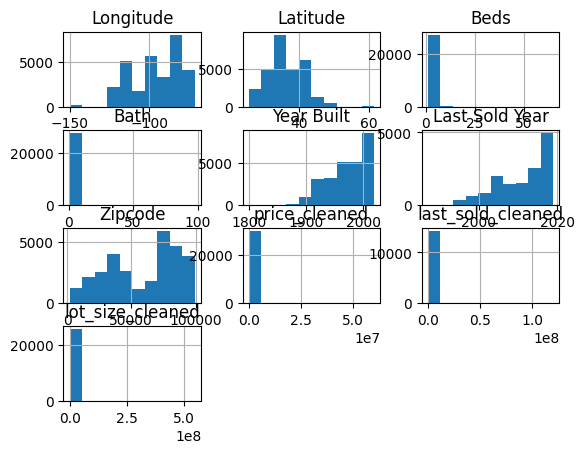

In [107]:
df.hist()